In [1]:
# load data from sklearn
from sklearn.datasets import load_breast_cancer

In [3]:
dt = load_breast_cancer()
dt.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
# check detailed information
print(dt.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [8]:
sum(dt.target==0)

212

as 0 count is 212 hence its Malignant and 1 means Benign

In [13]:
# lets prepare datset
import pandas as pd
X = pd.DataFrame(dt.data,columns=dt.feature_names)
X.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [15]:
y = dt.target
y[:2]

array([0, 0])

In [16]:
# splitting of data into training and testing
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.7)

In [23]:
# to ignore warnings
import warnings
warnings.simplefilter('ignore')

# create LR model
from sklearn.linear_model import LogisticRegression

In [20]:
LR = LogisticRegression()

In [24]:
LR.fit(X_train,y_train)

LogisticRegression()

In [27]:
# prediction
y_pred = LR.predict(X_test)
y_pred #predicted result

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [28]:
y_test # actual result

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0])

In [29]:
# check goodness of data
LR.score(X_train,y_train)*100

94.72361809045226

In [30]:
LR.score(X_test,y_test)*100

93.56725146198829

In [31]:
# check goodness of ur model
from sklearn.metrics import confusion_matrix

In [32]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 51,   6],
       [  5, 109]], dtype=int64)

In [33]:
len(y_test)

171

<Axes: >

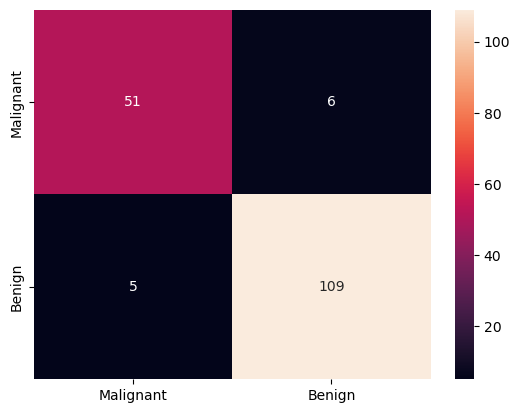

In [36]:
import seaborn as sns
sns.heatmap(cm,annot=True,xticklabels=['Malignant','Benign'],
           yticklabels=['Malignant','Benign'],fmt='d')

In [37]:
from sklearn.metrics import classification_report

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        57
           1       0.95      0.96      0.95       114

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



In [41]:
# lets check after scaling do we get better result or not??
from sklearn.preprocessing import StandardScaler

In [43]:
sd = StandardScaler()
# we need to convert inputs: X_train,X_test
#len(X_train),len(X_test)
# we fit_trainsform(trainData) nd transform(testdata)
# there is no need to convert outputs/target values

(398, 171)

In [46]:
new_xtrain = sd.fit_transform(X_train)
new_xtrain[:1]

array([[-0.83574416,  1.81351129, -0.8707859 , -0.75879301, -1.94628168,
        -1.25426617, -0.9133424 , -1.19870966,  0.18597447, -0.92435103,
        -0.99379136, -0.5859879 , -0.86811049, -0.67669335, -1.13988588,
        -0.5265705 , -0.5016287 , -1.38582064, -0.61251583, -0.64178261,
        -0.90633408,  1.28944368, -0.85481106, -0.7784242 , -1.76238699,
        -0.72270849, -0.78368235, -1.44274796, -0.10140802, -0.72733179]])

In [47]:
# lets create a new model
LR2 = LogisticRegression()
LR2.fit(new_xtrain,y_train)

LogisticRegression()

In [49]:
#without conversion/scaling of X_test
y_pred2 = LR2.predict(X_test)
y_pred2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [51]:
cm2 = confusion_matrix(y_test,y_pred2)
cm2

array([[ 57,   0],
       [114,   0]], dtype=int64)

In [52]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.33      1.00      0.50        57
           1       0.00      0.00      0.00       114

    accuracy                           0.33       171
   macro avg       0.17      0.50      0.25       171
weighted avg       0.11      0.33      0.17       171



In [54]:
new_xtrain[:1]

array([[-0.83574416,  1.81351129, -0.8707859 , -0.75879301, -1.94628168,
        -1.25426617, -0.9133424 , -1.19870966,  0.18597447, -0.92435103,
        -0.99379136, -0.5859879 , -0.86811049, -0.67669335, -1.13988588,
        -0.5265705 , -0.5016287 , -1.38582064, -0.61251583, -0.64178261,
        -0.90633408,  1.28944368, -0.85481106, -0.7784242 , -1.76238699,
        -0.72270849, -0.78368235, -1.44274796, -0.10140802, -0.72733179]])

In [55]:
X_test[:1]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
359,9.436,18.32,59.82,278.6,0.1009,0.05956,0.0271,0.01406,0.1506,0.06959,...,12.02,25.02,75.79,439.6,0.1333,0.1049,0.1144,0.05052,0.2454,0.08136


In [56]:
# lets transform X_test: bcz scaling should be performed on both
new_xtest = sd.transform(X_test)
new_xtest[:1]

array([[-1.368935  , -0.22670427, -1.35879052, -1.08498245,  0.2799334 ,
        -0.87002032, -0.78471821, -0.9234884 , -1.0852441 ,  0.90954795,
         0.30069601,  0.01431587,  0.13750669, -0.23691839, -0.05499091,
        -0.92874075, -0.28089384, -0.84481736, -0.14859836, -0.40915241,
        -0.91874303, -0.12187264, -0.97408322, -0.80049444,  0.02869578,
        -0.95316643, -0.75847594, -0.99836456, -0.72330598, -0.16454155]])

In [58]:
y_pred3 = LR2.predict(new_xtest)
y_pred3

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0])

In [59]:
cm3 = confusion_matrix(y_test,y_pred3)
cm3

array([[ 54,   3],
       [  1, 113]], dtype=int64)

In [60]:
cm

array([[ 51,   6],
       [  5, 109]], dtype=int64)

In [61]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        57
           1       0.97      0.99      0.98       114

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [74]:
test = new_xtest[121:122]
test

array([[-1.06498226,  0.2088212 , -0.9983047 , -0.93010514,  1.06434969,
         0.39836752, -0.33495151, -0.5051823 ,  0.37157939,  2.04350652,
        -0.28247573,  1.05294476, -0.42086589, -0.44941765,  1.66420802,
         0.60131079,  0.41156532,  0.55093964,  0.2465906 ,  1.02639768,
        -1.09660466, -0.48884721, -1.06790275, -0.91379993, -0.11452141,
        -0.35144858, -0.68927286, -0.83611747, -0.83509018,  0.31294492]])

In [70]:
y_test[121]

1

In [71]:
y_pred3[121]

1

In [76]:
LR2.predict_proba(test)
             # 0       1

array([[8.19245684e-05, 9.99918075e-01]])

In [68]:
test

array([[-1.368935  , -0.22670427, -1.35879052, -1.08498245,  0.2799334 ,
        -0.87002032, -0.78471821, -0.9234884 , -1.0852441 ,  0.90954795,
         0.30069601,  0.01431587,  0.13750669, -0.23691839, -0.05499091,
        -0.92874075, -0.28089384, -0.84481736, -0.14859836, -0.40915241,
        -0.91874303, -0.12187264, -0.97408322, -0.80049444,  0.02869578,
        -0.95316643, -0.75847594, -0.99836456, -0.72330598, -0.16454155]])

In [79]:
#1 Assignment:Use first 3 features ['mean radius', 'mean texture', 'mean perimeter']
# Check ur results before scaling and after scaling

#2 Use Feature selection techniquee and select 15 features and train test the model